In [37]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
import h5py
from scipy.stats import pearsonr
from lim.genetics import qtl
from lim.genetics.phenotype import NormalPhenotype
import logging
lim_logging = logging.getLogger('lim')
lim_logging.setLevel(logging.CRITICAL)

In [4]:
genotypes_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/GenotypeFiles/phg000520.v2.GTEx_MidPoint_Imputation.genotype-calls-vcf.c1/parse_data/GTEx_Analysis_20150112_OMNI_2.5M_5M_450Indiv_chr1to22_genot_imput_info04_maf01_HWEp1E6_ConstrVarIDs_all_chrom_filered_maf_subset_individuals_44_tissues.hdf5'

In [6]:
def get_donor_IDs(IDlist):
    return [str(x).split('-')[1] for x in IDlist]

In [35]:
#Genotype
with h5py.File(genotypes_filepath,'r') as f:
    genotype_IDs = f['genotype']['row_header']['sample_ID']
    donor_genotype_IDs = get_donor_IDs(genotype_IDs)
    unique_donor_genotype_IDs = np.unique(donor_genotype_IDs)
    matrix = np.array(f['genotype']['matrix'])
    matrix[matrix == 255] = 0
    # 449 genotypes
    # 449 unique genotype donors

In [38]:
from sklearn.decomposition import PCA

In [45]:
pca2 = PCA(n_components=2)

In [55]:
pca2.fit(matrix.T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca2.explained_variance_ratio_

array([ 0.53283937,  0.02215052])

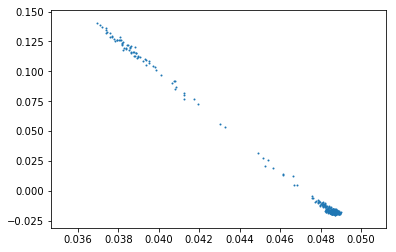

In [60]:
plt.scatter([x[0] for x in pca2.components_.T],[x[1] for x in pca2.components_.T], s=1)